<img src="https://jupyter.org/assets/main-logo.svg" width="25%" height="25%" />

<br/>

# Interactive Coding With [Jupyter Lab](https://jupyterlab.readthedocs.io/en/stable/)

From the docs:

>JupyterLab enables you to work with documents and activities such as Jupyter notebooks, text editors, terminals, and custom components in a flexible, integrated, and extensible manner. You can arrange multiple documents and activities side by side in the work area using tabs and splitters.

## What is interactive coding, and why is it useful?

Up to this point you've been executing your code as program from the command line to achieve your final results. There are scenarios, particularly in data analysis, where you need to frequently adjust parameters to search for meaningful patterns. Running a script to change a single parameter can be time consuming, especially if you have commands that require a large amount of CPU time. Interactive coding is simply running your scripts line-by-line or in "chunks" so you can frequently view the output as you write.

[From wikipedia:](https://en.wikipedia.org/wiki/List_of_programming_languages_by_type#Interactive_mode_languages)
_Interactive mode languages act as a kind of shell: expressions or statements can be entered one at a time, and the result of their evaluation is seen immediately. The interactive mode is also known as a REPL (read–eval–print loop)._

**Good coding practice alert!**

You should **always** ensure that your code runs, and generates **expected and reproducible results**, when executed from the command line. When you code interactively, it can be easy to assign variables out of order. This is especially true for notebooks.

### Installation

Jupyter Lab is incredibly easy to [install with conda](https://anaconda.org/conda-forge/jupyterlab). Simply run the following command in your home directory: 

`conda install -c conda-forge jupyterlab`

To launch Juypter Lab, type `jupyter lab` from your home directory. You'll notice that Jupyter Lab's built in file browser only allows you to navigate as far back as the directory you launch the app from. 

**Note:** Recall that conda is already installed in the Hershey lab computers. If you would like to install conda on your personal computer, you should install Miniconda, which you can find at this [link](https://docs.conda.io/en/latest/miniconda.html). I _do not_ recommend installing Anaconda, as it contains many large programs that you will likely never use.

### What's the difference between Anaconda, Miniconda, conda?

**Anaconda** and **Miniconda** are _software distributions_. Software distributions are a way to deliver software from a developer to the end user. **conda** is a _package manager_. A package manager is a collection of software tools that greatly simplifies managing your programming environment. In other words, conda is responsible for installing, upgrading, and configuring every program that you decide to add to your system.

Miniconda contains the minimal installer for conda. It's all you need to get started with installing your own bioinformatics software on your personal computer, or on your institution's server. Anaconda also contains conda, but includes a ton additional of software that you probably won't use.

## Interactive coding with Jupyter notebooks

Notebook documents are both readable documents containing the analysis description and the results (e.g. figures, tables), as well as executable code which can be run to perform data analysis. Everything in this presentation is written in a Jupyter Notebook.

Executable code in Jupyter notebooks is written into "cells". A cell can contain either Python code or markdown. Let's run some code from the Pandas introduction to see how this works.

A very effective way to write python scripts is to write a few lines of python in a notebook, run them to make sure they work, write a few more, and continue the test, write cycle until you have a working script. You can then copy and paste into a python script or export the python code from the notebook. Unfortunately, this approach doesn't work well for scripts that expect command line parameters (`sys.argv` or `argparse`) because there is no equivalent of a command line in notebooks. A possible workaround is to hardcode the command line parameters in your notebook and remove those lines when you convert the notebook into a script.

In [1]:
import os
import pandas as pd

# Change the working directory
os.chdir('/Users/ddiaz/Documents/diazdc-pfb2019/')

print("Done")

Done


In [2]:
cell_attributes = pd.read_csv("./meta_data.csv", index_col=0)

# Let's make a smaller dataset to work with
cell_df_sub = cell_attributes.iloc[:10,[0,1,3,5]]

# Set ascending=True to reverse the order
cell_df_sub.sort_values('n_counts', ascending=False)

# Sort by multiple columns in different directions
cell_df_sub.sort_values(by=['tree_ident', 'n_counts'], ascending=[True, False])

,n_counts,n_genes,percent_mito,tree_ident
index,,,,
AAACGGGTCCACGTGG-1_8,5586,2022,0.006445,3
AAAGATGCACGAAATA-1_10,1879,822,0.019702,3
AAACCTGGTTGAACTC-1_5,2765,1277,0.010138,6
AAACCTGTCACCTTAT-1_6,2771,1144,0.019530,7
AAACCTGAGCACCGCT-1_1,1980,928,0.026781,7
AAAGATGCATCGATTG-1_11,1135,566,0.056537,7
AAACCTGCACATTCGA-1_2,2238,894,0.024150,9
AAACCTGCATGCCTTC-1_4,3437,1438,0.012529,12
AAAGATGCAAGGACTG-1_9,1904,831,0.025223,13


### Inline figures

**Note:** The "magic" (prepended with `%`) command `%matplotlib inline` tells the IPython interpreter to render the image below the code cell when all cells are run from the beginning. We'll discuss a few of these commands below.

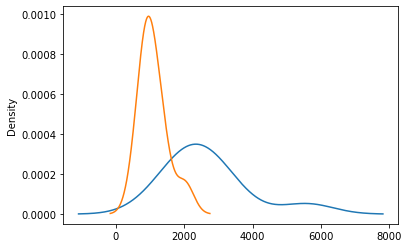

In [3]:
# Make sure matplotlib is installed
from matplotlib import pyplot as plt

%matplotlib inline
cell_df_sub.loc[:,'n_counts'].plot.kde()
cell_df_sub.loc[:,'n_genes'].plot.kde()

### Notebook use cases

#### When notebooks are ideal

Notebooks come in handy when you'd like to deploy your code as a reproducible narrative: imagine a combination of an automated lab notebook and a presentation. This works well when you are performing a particular analysis and you'd like to wrap your results, figures, and code into a single executable document. There are countless examples of notebooks on GitHub. Unfortunately GitHub does not consistently render notebooks on their website. I recommend copying/pasting the url for notebooks located in GitHub into Jupyter's [nbviewer](https://nbviewer.jupyter.org/).

#### When notebooks are not ideal

Notebooks can add an unecessary amount of "clutter" to your code. This can be problematic for writing long complex scripts which require debugging. Notebooks are not a good solution for production bioinformatics pipelines or scripts that you want to run without user input.

## Interactive programming directly from a python script

Interactive programming directly from the a python script is very similar to debugging, because you can evaluate each line of your script in a step-wise fashion. This is quite similar to notebook cell, but instead you highlight the amount of text you want to send to the interpreter.

Here we're going to open a regular python script from the Jupyter Lab sidebar which contains a few examples from previous problem sets. You can right click on the editor for any notebook or python script and select "New Console" to bring up the IPython interpreter for the file you are currently editing. **Shift+enter** is the default shortcut for sending your highlighted text to the interpreter.

**Note:** Sending text from a Python script to the interpreter requires that you highlight code with the **correct** indentation (e.g. four spaces). 

## The IPython console

The IPython console is a special type of Python interpreter that can be loaded with every Jupyter Lab session. In addition to running standard python commands, the IPython console can render images, run bash commands, provide syntax highlighting, and many other features which you can read about [here](https://ipython.readthedocs.io/en/stable/) and [here](https://www.codecademy.com/articles/how-to-use-ipython). Let's take a look at a few examples.

### Shell commands in the IPython console

[_Adapted from the Python Data Science Handbook_](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/01.05-IPython-And-Shell-Commands.ipynb)

One of the most useful features is the ability to run bash commands in the IPython console without any extra modules. You simply need to prepend your bash command with a `!`. Alternatively, you can simply type in "ls", but you need to be careful that you don't have a variable in your Python session that

In [4]:
!ls
!pwd
!echo "printing from the shell"

Jupyter_Lab_intro.ipynb Pandas_example.py       Unix2
Jupyter_Lab_ps1.py      Project                 gitouttahere.sh
Jupyter_Lab_sample.py   Python                  message.txt
Pandas.md               README.md               meta_data.csv
/Users/ddiaz/Documents/diazdc-pfb2019
printing from the shell


In [5]:
contents = !ls
print(contents)

directory = !pwd

print(directory)
type(directory)

['Jupyter_Lab_intro.ipynb', 'Jupyter_Lab_ps1.py', 'Jupyter_Lab_sample.py', 'Pandas.md', 'Pandas_example.py', 'Project', 'Python', 'README.md', 'Unix2', 'gitouttahere.sh', 'message.txt', 'meta_data.csv']
['/Users/ddiaz/Documents/diazdc-pfb2019']


IPython.utils.text.SList

### IPython "magic" commands

From [the IPython manual](https://ipython.readthedocs.io/en/stable/interactive/magics.html):


>IPython has a set of predefined ‘magic functions’ that you can call with a command line style syntax. There are two kinds of magics, line-oriented and cell-oriented. Line magics are prefixed with the `%` character and work much like OS command-line calls: they get as an argument the rest of the line, where arguments are passed without parentheses or quotes. Cell magics are prefixed with a double `%%`, and they are functions that get as an argument not only the rest of the line, but also the lines below it in a separate argument.

Let's take a look a few of the most useful IPython magic commands. You can find a complete summary of them in [this section](https://ipython.readthedocs.io/en/stable/interactive/magics.html) of IPython manual.

**Note:** magic commands can be run in the IPython console or a notebook cell.

#### %who_ls

Displays all variables in working environment

In [6]:
%who_ls

['cell_attributes', 'cell_df_sub', 'contents', 'directory', 'os', 'pd', 'plt']

#### %matplotlib

This function lets you activate matplotlib interactive support at any point during an IPython session. It does not import anything into the interactive namespace.

In [7]:
%matplotlib inline

#### %%writefile

Write the contents of a cell to a file.

In [8]:
%%writefile message.txt
"don't forget to commit your changes!"

Overwriting message.txt


#### %time 

Time execution of a Python statement or expression. When used with a single `%` the time for a command on a single line is returned. When used with `%%` the run time for the whole cell is returned.

In [10]:
%%time

import time
time.sleep(2)
print("wake up")

wake up
CPU times: user 831 µs, sys: 1.45 ms, total: 2.28 ms
Wall time: 2 s


#### %load

Load a python script into a cell.

In [1]:
%load Jupyter_Lab_ps1.py

## Launching Jupyter Lab from a Remote Server

If you're working from a remote server Jupyter Lab can be launched with a couple extra steps. The key argument when launching the app is `--no-browser` (this is a useful google keyword if you need to troubleshoot connection issues).

```
nohup jupyter lab --no-browser --port=8889
```

The port doesn't have to be specific. After running this command, there will be an output file called "nohup.out" in the directory you launched the app from. At the **very end** of this file there will be a url token that looks like the following:

```
http://localhost:8889/?token=c8baf0f64a424c15503071405c6da1a5ca78af38c12b25c9
```


Next, go to your local terminal and type in the following command:

```
ssh -N -f -L localhost:8889:localhost:8889 username@hostname
```

Now you can copy/paste the token produced in nohup.out in your local browser when prompted.

## Summary

It's important to note that there is no single "best" application for writing code. As you continue to write your own scripts, you'll come across a pelthora of programs (and opinions) that will all produce the same result. If you are curious, I fully encourage you to explore and see what works best for you. Here's a [great Stackoverflow survey](https://insights.stackoverflow.com/survey/2019#technology-_-most-popular-development-environments) over some of the most popular text editors/IDEs that programmers are currently using. Nearly all of these options are free.